In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif

### The dataset that we will use for this project will be the "Breast Cancer Wisconsin (Diagnostic) Data Set, and it deals with binary classification and includes features computed from digitized images of biopsies.  I will perform many types of models and select the one that gives us the best cross validated score, while balancing the performance time.  Also, I will provide classification reports, ROC curves and AUC scores for each respective model

In [29]:
column_names = ['SampleCode', 'ClumpThickness', 'UniformityCellSize', 'Uniformity_CellShape', 'MarginalAdhesion',
               'Single_Epi_CellSize', 'BareNuclei', 'BlandChromatin', 'NormalNucleolei', 'Mitosis', 'Class']

df = pd.read_csv('breast cancer wisconsin.csv', names=column_names)
df = df.drop_duplicates()
# = df.reset_index()
print(df.head())
print(df.shape)

   SampleCode  ClumpThickness  UniformityCellSize  Uniformity_CellShape  \
0     1000025               5                   1                     1   
1     1002945               5                   4                     4   
2     1015425               3                   1                     1   
3     1016277               6                   8                     8   
4     1017023               4                   1                     1   

   MarginalAdhesion  Single_Epi_CellSize BareNuclei  BlandChromatin  \
0                 1                    2          1               3   
1                 5                    7         10               3   
2                 1                    2          2               3   
3                 1                    3          4               3   
4                 3                    2          1               3   

   NormalNucleolei  Mitosis  Class  
0                1        1      2  
1                2        1      2  
2          

In [30]:
#replace strings with numbers
df['BareNuclei'] = df['BareNuclei'].str.replace('?', '1')
#print(df['BareNuclei'][:50])

#check to see if all values in series is numeric
#print(df['BareNuclei'][:50].str.isnumeric())

In [31]:
# Resampling our data to correct for imbalance in our class variable

# Class count, 2 represents benign, and 4 represents malignant
count_class_2, count_class_4 = df.Class.value_counts()
print(count_class_2)
print(count_class_4)
# Divide by class
df_class_2 = df[df['Class'] == 2]
df_class_4 = df[df['Class'] == 4]

453
238


Random under-sampling:
4    238
2    238
Name: Class, dtype: int64


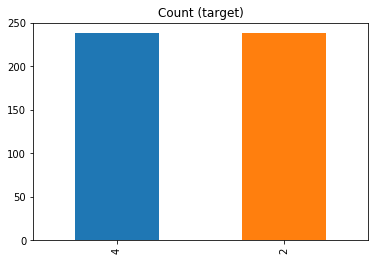

In [32]:
#extract the observations with class zero, equal to the number of obervations equal
df_class_2_under = df_class_2.sample(count_class_4)

#create a new dataframe with the same number of values for our two classes
new_df = pd.concat([df_class_2_under, df_class_4], axis=0)

print('Random under-sampling:')
print(new_df.Class.value_counts())

new_df.Class.value_counts().plot(kind='bar', title='Count (target)')

In [33]:
#check for any null spaces in our data
new_df.isnull().sum()

SampleCode              0
ClumpThickness          0
UniformityCellSize      0
Uniformity_CellShape    0
MarginalAdhesion        0
Single_Epi_CellSize     0
BareNuclei              0
BlandChromatin          0
NormalNucleolei         0
Mitosis                 0
Class                   0
dtype: int64

In [34]:
#split the data
X = new_df.drop(['Class', 'SampleCode'], 1)

#make the dependent 'class' variable binary
new_df['Class'] = np.where(new_df['Class'] > 2, 1, 0)

Y = new_df['Class']

print(X.shape)
print(Y.shape)
#print(Y)

(476, 9)
(476,)


AxesSubplot(0.125,0.125;0.62x0.755)


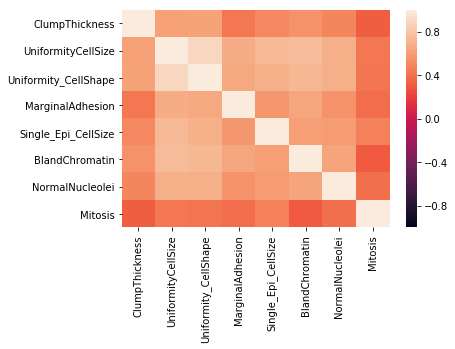

In [35]:
#Creating a heatmap to check for any correlation between our independent variables.
Xvar_heatmap = sns.heatmap(X.corr(), vmin=-1, vmax=1)

print(Xvar_heatmap)


#### From the heatmap above, we see that there is correlation between some of our independent variables.  Specifically the independent variables related to cell shape and cell size, such as Uniformity_CellShape, UniformityCellSize and Single_Epi_CellSize, have high correlations with each other.  This could be problematic for some of our models; for  example with Naive Bayes because of this model's assumption that all independent variables are completely independent of each other. 

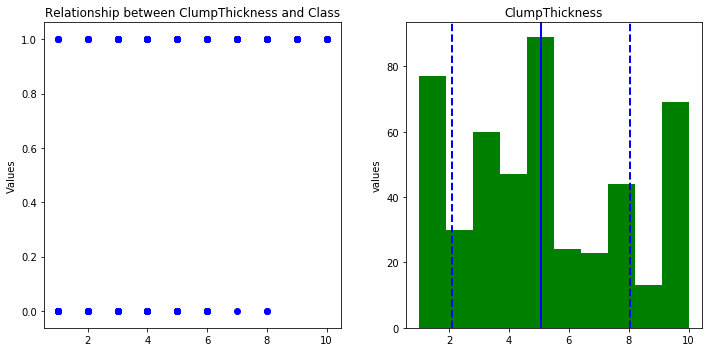

In [135]:
#column_names = ['SampleCode', 'ClumpThickness', 'UniformityCellSize', 'Uniformity_CellShape', 'MarginalAdhesion',
#               'Single_Epi_CellSize', 'BareNuclei', 'BlandChromatin', 'NormalNucleolei', 'Mitosis', 'Class']


#plotting the relationship between the independent and dependent variables, as well as the histograpsh of independent variables.
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(x = new_df['ClumpThickness'], y = new_df['Class'], color='blue')
plt.ylabel('Values')
plt.title('Relationship between ClumpThickness and Class')

plt.subplot(1, 2, 2)
plt.hist(new_df['ClumpThickness'], color='green')
plt.axvline(new_df['ClumpThickness'].mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(new_df['ClumpThickness'].mean() + new_df['ClumpThickness'].std(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(new_df['ClumpThickness'].mean()- new_df['ClumpThickness'].std(), color='b', linestyle='dashed', linewidth=2) 
plt.ylabel('values')
plt.title('ClumpThickness')

plt.tight_layout()
plt.show()

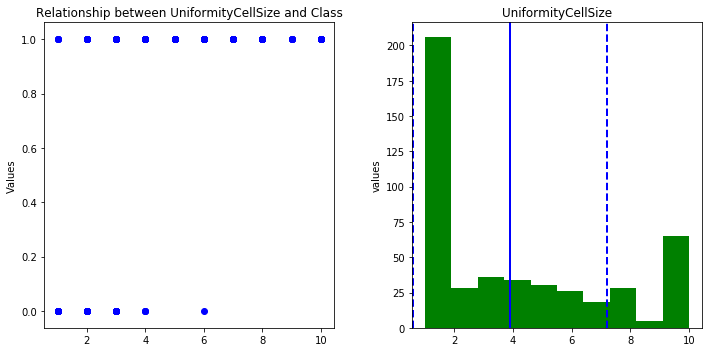

In [136]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(x = new_df['UniformityCellSize'], y = new_df['Class'], color='blue')
plt.ylabel('Values')
plt.title('Relationship between UniformityCellSize and Class')

plt.subplot(1, 2, 2)
plt.hist(new_df['UniformityCellSize'], color='green')
plt.axvline(new_df['UniformityCellSize'].mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(new_df['UniformityCellSize'].mean() + new_df['UniformityCellSize'].std(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(new_df['UniformityCellSize'].mean()- new_df['UniformityCellSize'].std(), color='b', linestyle='dashed', linewidth=2) 
plt.ylabel('values')
plt.title('UniformityCellSize')

plt.tight_layout()
plt.show()

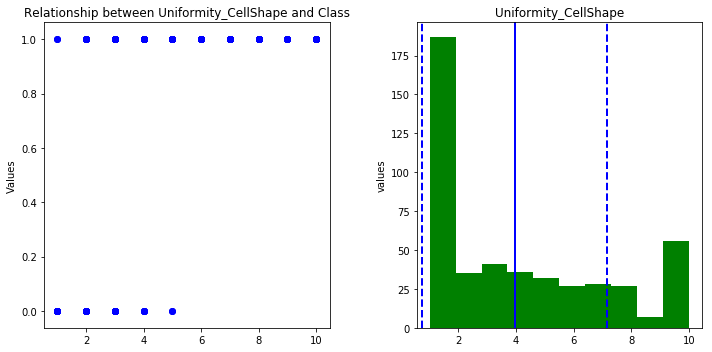

In [137]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(x = new_df['Uniformity_CellShape'], y = new_df['Class'], color='blue')
plt.ylabel('Values')
plt.title('Relationship between Uniformity_CellShape and Class')

plt.subplot(1, 2, 2)
plt.hist(new_df['Uniformity_CellShape'], color='green')
plt.axvline(new_df['Uniformity_CellShape'].mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(new_df['Uniformity_CellShape'].mean() + new_df['Uniformity_CellShape'].std(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(new_df['Uniformity_CellShape'].mean()- new_df['Uniformity_CellShape'].std(), color='b', linestyle='dashed', linewidth=2) 
plt.ylabel('values')
plt.title('Uniformity_CellShape')

plt.tight_layout()
plt.show()

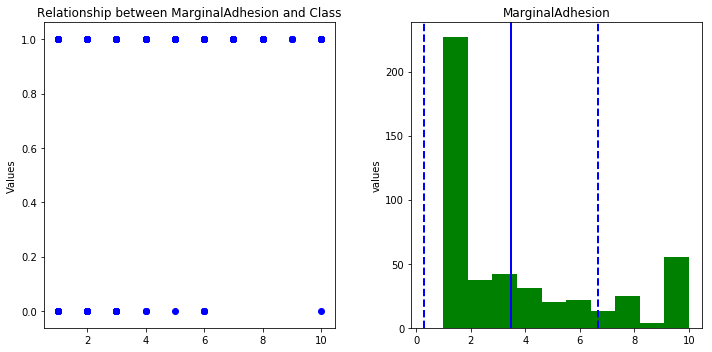

In [138]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(x = new_df['MarginalAdhesion'], y = new_df['Class'], color='blue')
plt.ylabel('Values')
plt.title('Relationship between MarginalAdhesion and Class')

plt.subplot(1, 2, 2)
plt.hist(new_df['MarginalAdhesion'], color='green')
plt.axvline(new_df['MarginalAdhesion'].mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(new_df['MarginalAdhesion'].mean() + new_df['MarginalAdhesion'].std(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(new_df['MarginalAdhesion'].mean()- new_df['MarginalAdhesion'].std(), color='b', linestyle='dashed', linewidth=2) 
plt.ylabel('values')
plt.title('MarginalAdhesion')

plt.tight_layout()
plt.show()

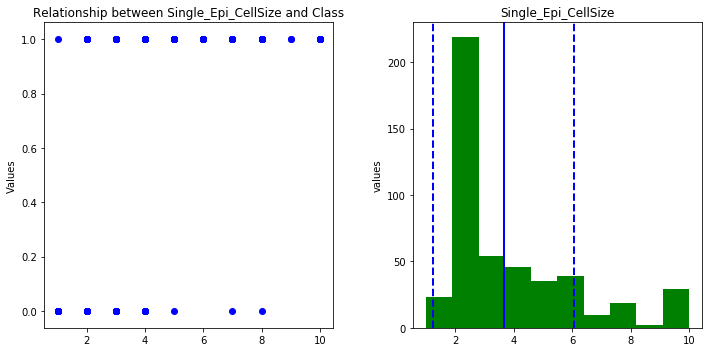

In [139]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(x = new_df['Single_Epi_CellSize'], y = new_df['Class'], color='blue')
plt.ylabel('Values')
plt.title('Relationship between Single_Epi_CellSize and Class')

plt.subplot(1, 2, 2)
plt.hist(new_df['Single_Epi_CellSize'], color='green')
plt.axvline(new_df['Single_Epi_CellSize'].mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(new_df['Single_Epi_CellSize'].mean() + new_df['Single_Epi_CellSize'].std(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(new_df['Single_Epi_CellSize'].mean()- new_df['Single_Epi_CellSize'].std(), color='b', linestyle='dashed', linewidth=2) 
plt.ylabel('values')
plt.title('Single_Epi_CellSize')

plt.tight_layout()
plt.show()

ValueError: color kwarg must have one color per dataset

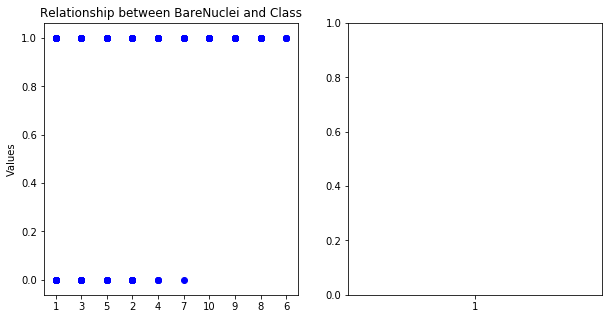

In [142]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(x = new_df['BareNuclei'], y = new_df['Class'], color='blue')
plt.ylabel('Values')
plt.title('Relationship between BareNuclei and Class')

plt.subplot(1, 2, 2)
plt.hist(new_df['BareNuclei'], color='green')
plt.axvline(new_df['BareNuclei'].mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(new_df['BareNuclei'].mean() + new_df['BareNuclei'].std(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(new_df['BareNuclei'].mean()- new_df['BareNuclei'].std(), color='b', linestyle='dashed', linewidth=2) 
plt.ylabel('values')
plt.title('BareNuclei')

plt.tight_layout()
plt.show()

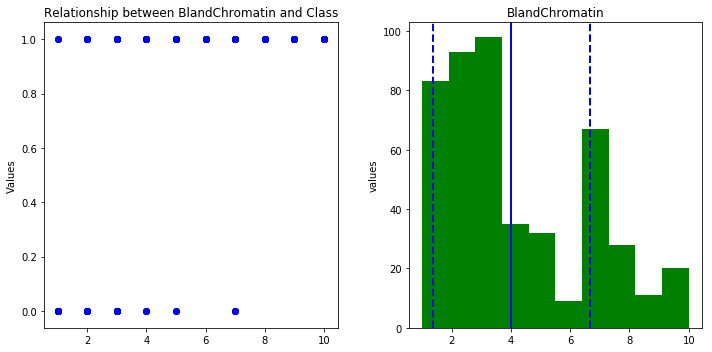

In [143]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(x = new_df['BlandChromatin'], y = new_df['Class'], color='blue')
plt.ylabel('Values')
plt.title('Relationship between BlandChromatin and Class')

plt.subplot(1, 2, 2)
plt.hist(new_df['BlandChromatin'], color='green')
plt.axvline(new_df['BlandChromatin'].mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(new_df['BlandChromatin'].mean() + new_df['BlandChromatin'].std(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(new_df['BlandChromatin'].mean()- new_df['BlandChromatin'].std(), color='b', linestyle='dashed', linewidth=2) 
plt.ylabel('values')
plt.title('BlandChromatin')

plt.tight_layout()
plt.show()

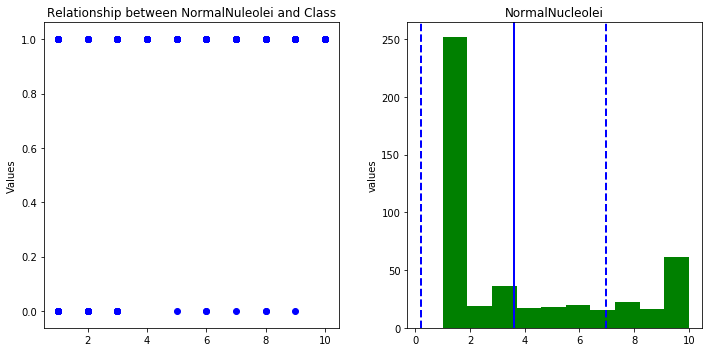

In [144]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(x = new_df['NormalNucleolei'], y = new_df['Class'], color='blue')
plt.ylabel('Values')
plt.title('Relationship between NormalNuleolei and Class')

plt.subplot(1, 2, 2)
plt.hist(new_df['NormalNucleolei'], color='green')
plt.axvline(new_df['NormalNucleolei'].mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(new_df['NormalNucleolei'].mean() + new_df['NormalNucleolei'].std(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(new_df['NormalNucleolei'].mean()- new_df['NormalNucleolei'].std(), color='b', linestyle='dashed', linewidth=2) 
plt.ylabel('values')
plt.title('NormalNucleolei')

plt.tight_layout()
plt.show()

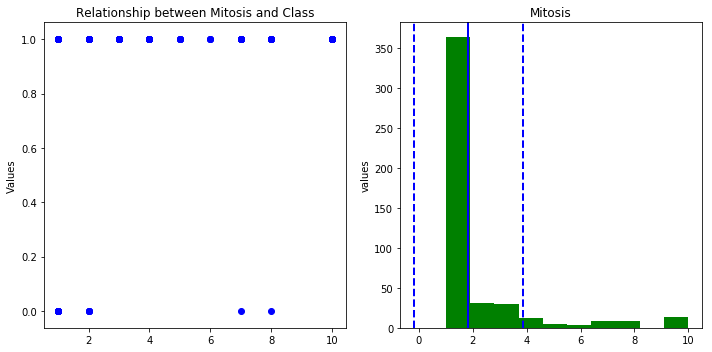

In [145]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(x = new_df['Mitosis'], y = new_df['Class'], color='blue')
plt.ylabel('Values')
plt.title('Relationship between Mitosis and Class')

plt.subplot(1, 2, 2)
plt.hist(new_df['Mitosis'], color='green')
plt.axvline(new_df['Mitosis'].mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(new_df['Mitosis'].mean() + new_df['Mitosis'].std(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(new_df['Mitosis'].mean()- new_df['Mitosis'].std(), color='b', linestyle='dashed', linewidth=2) 
plt.ylabel('values')
plt.title('Mitosis')

plt.tight_layout()
plt.show()

In [149]:
#sns.pairplot(X)
#X_grid = sns.PairGrid(X)
#X_grid = X_grid.map(plt.scatter)

#### I will attempt to deal with this multicollinearity using PCA, and separately also with SelectKBest.  I will then run each model using the full feature dataset, the PCA dataset with reduced dimensions, and the SelectKBest dataset with the reduced number of features, side by side so that I can give an accurate comparison.

In [37]:
#initial set of train and test groups, before applying SelectKBest and PCA.

train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=.3, random_state=10)

# PCA:

In [38]:
# Normalize the data so that all variables have a mean of 0 and standard deviation
# o

X_scaled = StandardScaler().fit_transform(X)

C:\Users\PV-R68G\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\PV-R68G\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [39]:
#Apply PCA

pca = PCA(.95)
X_pca = pca.fit_transform(X_scaled)

comp_no = pca.n_components_
comp_var_ratio = pca.explained_variance_ratio_

print(comp_no)
print(comp_var_ratio)
#print(p_components)

7
[0.63094098 0.09112861 0.06461984 0.05756111 0.04450879 0.03611761
 0.03389202]


In [40]:
#pca data to dataframe
pca_df = pd.DataFrame(data=X_pca)
print(pca_df.head())
print(pca_df.shape)

          0         1         2         3         4         5         6
0 -2.627225  0.320658  0.503690  0.125686  0.115242  0.188199  0.053465
1 -2.392459  0.049797  0.770147 -0.537064 -0.222307  0.111515  0.259926
2 -2.425216  0.223587 -0.059423  0.050213  0.097155  0.038588  0.223547
3 -1.772707  0.516493 -0.510069 -0.181802  0.081603 -0.378453  0.397278
4 -2.019067  0.078353  0.764373  0.132832  0.077406 -0.199504 -0.364079
(476, 7)


In [41]:
#After applying PCA, I split the data into a second set of train and test groups

train_X_pca, test_X_pca, train_Y_pca, test_Y_pca = train_test_split(X_pca, Y, test_size=.3, random_state=20)

# SelectKBest:

In [99]:
#performing GridsearchCV to get the best parameters for SelectKBest.
Kbest = SelectKBest().fit_transform(X, Y)
K_params = {'k':[1,2,3,4,5,6], 'score_func':[chi2, f_classif]}
Kgrid = GridSearchCV(Kbest, K_params, cv=5, scoring='accuracy')
Kgrid.fit(X, Y)
print('Best parameters for SelectKBest:', Kgrid.best_params_)

ValueError: k should be >=0, <= n_features = 9; got 10. Use k='all' to return all features.

In [43]:
#applying selectKBest.
X_skb = SelectKBest(f_classif, k=6).fit_transform(X, Y)
print(X_skb.shape)

(476, 6)


In [44]:
#After applying SelectKBest, I split the data into a third set of train and test groups
train_X_skb, test_X_skb, train_Y_skb, test_Y_skb = train_test_split(X_skb, Y, test_size=.3, random_state=20)

# Naive Bayes:

In [45]:
#Model using full dataset

# Instantiate our model and store it in a variable
bnb = BernoulliNB()

#set start time
start_time = datetime.datetime.now()

# Fit our model to the data.
bnb.fit(train_X, train_Y)

# Classify, storing the result in a new variable.
y_pred_bayes = bnb.predict(test_X)

#Run accuracy score
print('Accuracy score: ' + str(metrics.accuracy_score(test_Y, y_pred_bayes)))

#calculate end time
end_time = datetime.datetime.now()

#print the execution run time for our model
print('\nDuration: {}'.format(end_time - start_time))
print()

#Use cross validation to gauge the accuracy of our model
Nbayes_cvs = cross_val_score(bnb, X, Y, cv=10, scoring='accuracy')
print(Nbayes_cvs)
print('Average cross validated score from our Naive Bayes model is: ' + str(np.mean(Nbayes_cvs)))


Accuracy score: 0.48951048951048953

Duration: 0:00:00.008005

[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
Average cross validated score from our Naive Bayes model is: 0.5


AUC Score: 0.500


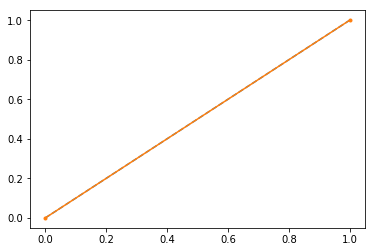

In [46]:
# predict probabilities
probs = bnb.predict_proba(test_X)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
bayes_auc = roc_auc_score(test_Y, probs)
print('AUC Score: %.3f' % bayes_auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(test_Y, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [47]:
#perform classification report of naive bayes model
class_names = ['Class_2_Benign', 'Class_4_Malignant']
bayes_report = classification_report(test_Y, y_pred_bayes, target_names=class_names)
print(bayes_report)

                   precision    recall  f1-score   support

   Class_2_Benign       0.00      0.00      0.00        73
Class_4_Malignant       0.49      1.00      0.66        70

        micro avg       0.49      0.49      0.49       143
        macro avg       0.24      0.50      0.33       143
     weighted avg       0.24      0.49      0.32       143



C:\Users\PV-R68G\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\PV-R68G\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\PV-R68G\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [48]:
#create confusion matrix
confusion_matrix(test_Y, y_pred_bayes)

array([[ 0, 73],
       [ 0, 70]], dtype=int64)

### The Naive Bayes model does a poor job of predicting accurate class values.  According to the confusion matrix, the naive bayes model predicted just as many positives correctly, as it predicted negatives incorrectly.  This matches the AUC score of .5.  The ROC curve, AUC score, and the confusion matrix, combined tell us that this model was no better than just taking a random guess. 
### Naive Bayes gave a cross validated score of .5.  One reason for this could be, as we saw earlier, alot of our independent variables were highly correlated with one another.  An assumption of Naive Bayes to work properly is that the predictior variables have to be truly independent of each other.

### I will next perform the main tree based algorithm models, such as The Decision Tree, Random Forest, and Gradient Boosting, and give a short analysis after each model.

In [49]:
#Naive Bayes model using PCA

# Instantiate our model and store it in a variable
bnb_pca = BernoulliNB()

#set start time
start_time_pca = datetime.datetime.now()

# Fit our model to the data.
bnb_pca.fit(train_X_pca, train_Y_pca)

# Classify, storing the result in a new variable.
ypred_bayes_pca = bnb_pca.predict(test_X_pca)

#Run accuracy score
print('Accuracy score: ' + str(metrics.accuracy_score(test_Y_pca, ypred_bayes_pca)))

#calculate end time
end_time_pca = datetime.datetime.now()

#print the execution run time for our model
print('\nDuration: {}'.format(end_time_pca - start_time_pca))
print()

#Use cross validation to gauge the accuracy of our model
Nbayes_cvs_pca = cross_val_score(bnb_pca, X, Y, cv=5, scoring='accuracy')
print(Nbayes_cvs_pca)
print('Average cross validated score from our Naive Bayes model is: ' + str(np.mean(Nbayes_cvs_pca)))


Accuracy score: 0.9230769230769231

Duration: 0:00:00.005002

[0.5 0.5 0.5 0.5 0.5]
Average cross validated score from our Naive Bayes model is: 0.5


### The Accuracy score of Naive Bayes improved dramatically using PCA, possibly because PCA utilized the main components that explained the majority of the variance in the data, and in the process took out some of the unnecessary correlated columns.  But the average cross validated score was still a disappointing .5

AUC Score: 0.972


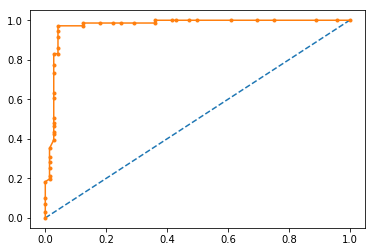

In [50]:
# predict probabilities
probs_pca = bnb_pca.predict_proba(test_X_pca)
# keep probabilities for the positive outcome only
probs_pca = probs_pca[:, 1]
# calculate AUC
bayes_auc_pca = roc_auc_score(test_Y_pca, probs_pca)
print('AUC Score: %.3f' % bayes_auc_pca)
# calculate roc curve
fpr_pca, tpr_pca, thresholds = roc_curve(test_Y_pca, probs_pca)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_pca, tpr_pca, marker='.')
# show the plot
plt.show()

In [51]:
#perform classification report of naive bayes model after PCA
class_names = ['Class_2_Benign', 'Class_4_Malignant']
bayes_report_pca = classification_report(test_Y_pca, ypred_bayes_pca, target_names=class_names)
print(bayes_report_pca)

                   precision    recall  f1-score   support

   Class_2_Benign       0.97      0.88      0.92        72
Class_4_Malignant       0.88      0.97      0.93        71

        micro avg       0.92      0.92      0.92       143
        macro avg       0.93      0.92      0.92       143
     weighted avg       0.93      0.92      0.92       143



In [52]:
#create confusion matrix for naive bayes model after pca
confusion_matrix(test_Y_pca, ypred_bayes_pca)

array([[63,  9],
       [ 2, 69]], dtype=int64)

In [53]:
#Naive Bayes model using SelectKbest

# Instantiate our model and store it in a variable
bnb_skb = BernoulliNB()

#set start time
start_time_skb = datetime.datetime.now()

# Fit our model to the data.
bnb_skb.fit(train_X_skb, train_Y_skb)

# Classify, storing the result in a new variable.
ypred_bayes_skb = bnb_skb.predict(test_X_skb)

#Run accuracy score
print('Accuracy score: ' + str(metrics.accuracy_score(test_Y_skb, ypred_bayes_skb)))

#calculate end time
end_time_skb = datetime.datetime.now()

#print the execution run time for our model
print('\nDuration: {}'.format(end_time_skb - start_time_skb))
print()

#Use cross validation to gauge the accuracy of our model
Nbayes_cvs_skb = cross_val_score(bnb_skb, X, Y, cv=5, scoring='accuracy')
print(Nbayes_cvs_skb)
print('Average cross validated score from our Naive Bayes model is: ' + str(np.mean(Nbayes_cvs_skb)))


Accuracy score: 0.4965034965034965

Duration: 0:00:00.006003

[0.5 0.5 0.5 0.5 0.5]
Average cross validated score from our Naive Bayes model is: 0.5


AUC Score: 0.500


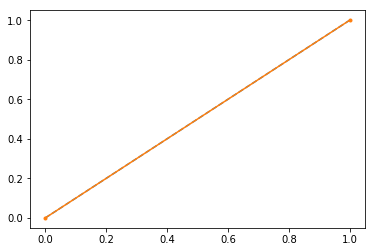

In [54]:
# predict probabilities
probs_skb = bnb_skb.predict_proba(test_X_skb)
# keep probabilities for the positive outcome only
probs_skb = probs_skb[:, 1]
# calculate AUC
bayes_auc_skb = roc_auc_score(test_Y_skb, probs_skb)
print('AUC Score: %.3f' % bayes_auc_skb)
# calculate roc curve
fpr_skb, tpr_skb, thresholds = roc_curve(test_Y_skb, probs_skb)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_skb, tpr_skb, marker='.')
# show the plot
plt.show()

In [55]:
#perform classification report of naive bayes model after PCA
class_names = ['Class_2_Benign', 'Class_4_Malignant']
bayes_report_skb = classification_report(test_Y_skb, ypred_bayes_skb, target_names=class_names)
print(bayes_report_skb)

                   precision    recall  f1-score   support

   Class_2_Benign       0.00      0.00      0.00        72
Class_4_Malignant       0.50      1.00      0.66        71

        micro avg       0.50      0.50      0.50       143
        macro avg       0.25      0.50      0.33       143
     weighted avg       0.25      0.50      0.33       143



C:\Users\PV-R68G\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\PV-R68G\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\PV-R68G\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [56]:
#create confusion matrix for naive bayes model after selectKbest
confusion_matrix(test_Y_skb, ypred_bayes_skb)

array([[ 0, 72],
       [ 0, 71]], dtype=int64)

# Decision Tree

In [57]:
# perform grid search to find the optimal parameters for our decision tree model, using the full dataset.
dtree = tree.DecisionTreeClassifier(random_state=2)
tree_param_grid = {'max_depth':[2,4,6], 'min_samples_split':[2,5,8], 'max_features':[2,4,6], 'criterion':['entropy', 'gini']}
dtree_grid = GridSearchCV(dtree, tree_param_grid, cv=5)
dtree_grid.fit(train_X, train_Y)
print('Best parameters for decision tree:', dtree_grid.best_params_)

Best parameters for decision tree: {'criterion': 'gini', 'max_depth': 4, 'max_features': 4, 'min_samples_split': 5}


C:\Users\PV-R68G\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [61]:
# Initialize and train our tree on the full dataset.
decision_tree = tree.DecisionTreeClassifier(
    criterion='gini',
    max_features=4,
    max_depth=4,
    min_samples_split=5,
    random_state = 2
)

#set start time
start_time_tree = datetime.datetime.now()

#train our tree
decision_tree.fit(train_X, train_Y)

# Classify, storing the result in a new variable.
y_pred_dtree = decision_tree.predict(test_X)

#get accuracy score from our model
print('Accuracy score for decision tree Model: ' + str(metrics.accuracy_score(test_Y, y_pred_dtree)))

#calculate end time
end_time_tree = datetime.datetime.now()

#print the execution run time for our model
print('\nDuration: {}'.format(end_time_tree - start_time_tree))
print()

#get accuracy score of decision tree
tree_score = cross_val_score(decision_tree, X, Y, cv=5, scoring='accuracy')
print(tree_score)
print('Average cross validated score from our decision tree model is: ' + str(np.mean(tree_score)))

Accuracy score for decision tree Model: 0.9370629370629371

Duration: 0:00:00.006004

[0.92708333 0.94791667 0.96875    0.92553191 0.96808511]
Average cross validated score from our decision tree model is: 0.9474734042553191


AUC Score: 0.954


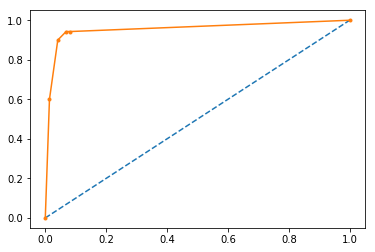

In [62]:
#Get AUC and create ROC for decision tree with full data
# predict probabilities
probs_dtree = decision_tree.predict_proba(test_X)
# keep probabilities for the positive outcome only
probs_dtree = probs_dtree[:, 1]
# calculate AUC
dtree_auc = roc_auc_score(test_Y, probs_dtree)
print('AUC Score: %.3f' % dtree_auc)
# calculate roc curve
fpr_dtree, tpr_dtree, thresholds_dtree = roc_curve(test_Y, probs_dtree)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_dtree, tpr_dtree, marker='.')
# show the plot
plt.show()

In [63]:
#perform classification report of naive bayes model after PCA
class_names = ['Class_2_Benign', 'Class_4_Malignant']
tree_report = classification_report(test_Y, y_pred_dtree, target_names=class_names)
print(tree_report)

                   precision    recall  f1-score   support

   Class_2_Benign       0.94      0.93      0.94        73
Class_4_Malignant       0.93      0.94      0.94        70

        micro avg       0.94      0.94      0.94       143
        macro avg       0.94      0.94      0.94       143
     weighted avg       0.94      0.94      0.94       143



In [64]:
#create confusion matrix for naive bayes model after selectKbest
confusion_matrix(test_Y, y_pred_dtree)

array([[68,  5],
       [ 4, 66]], dtype=int64)

In [65]:
#GridsearchCV with PCA
dtree_pca = tree.DecisionTreeClassifier(random_state=4)
tree_param_grid_pca = {'max_depth':[2,4,6,8], 'min_samples_split':[2,5,8,10], 'max_features':[2,4,6], 
                       'criterion':['entropy', 'gini']}
dtree_grid_pca = GridSearchCV(dtree_pca, tree_param_grid_pca, cv=5)
dtree_grid_pca.fit(train_X_pca, train_Y_pca)
print('Best parameters for decision tree:', dtree_grid_pca.best_params_)

Best parameters for decision tree: {'criterion': 'entropy', 'max_depth': 2, 'max_features': 2, 'min_samples_split': 2}


In [66]:
# Initialize and train the tree using PCA.
decision_tree_pca = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=2,
    max_depth=2,
    min_samples_split=2,
    random_state = 4
)

#set start time
start_time_treePca = datetime.datetime.now()

#train our tree
decision_tree_pca.fit(train_X_pca, train_Y_pca)

# Classify, storing the result in a new variable.
ypred_dtree_pca = decision_tree_pca.predict(test_X_pca)

#get accuracy score from our model
print('Accuracy score for decision tree Model after using PCA: ' + str(metrics.accuracy_score(test_Y_pca, ypred_dtree_pca)))

#calculate end time
end_time_treePca = datetime.datetime.now()

#print the execution run time for our model
print('\nDuration: {}'.format(end_time_treePca - start_time_treePca))
print()

#get accuracy score of decision tree
tree_score_pca = cross_val_score(decision_tree_pca, X, Y, cv=5, scoring='accuracy')
print(tree_score_pca)
print('Average cross validated score from our decision tree model is: ' + str(np.mean(tree_score_pca)))

Accuracy score for decision tree Model after using PCA: 0.972027972027972

Duration: 0:00:00.004002

[0.91666667 0.92708333 0.92708333 0.94680851 0.96808511]
Average cross validated score from our decision tree model is: 0.937145390070922


AUC Score: 0.972


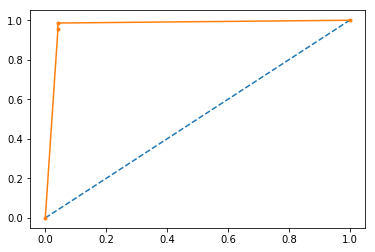

In [67]:
#Get AUC and create ROC for decision tree with PCA
# predict probabilities
probs_dtree_pca = decision_tree_pca.predict_proba(test_X_pca)
# keep probabilities for the positive outcome only
probs_dtree_pca = probs_dtree_pca[:, 1]
# calculate AUC
dtree_auc_pca = roc_auc_score(test_Y_pca, probs_dtree_pca)
print('AUC Score: %.3f' % dtree_auc_pca)
# calculate roc curve
fpr_dtree_pca, tpr_dtree_pca, thresholds_dtree_pca = roc_curve(test_Y_pca, probs_dtree_pca)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_dtree_pca, tpr_dtree_pca, marker='.')
# show the plot
plt.show()

In [68]:
#perform classification report of naive bayes model after PCA
class_names = ['Class_2_Benign', 'Class_4_Malignant']
tree_report_pca = classification_report(test_Y_pca, ypred_dtree_pca, target_names=class_names)
print(tree_report_pca)

                   precision    recall  f1-score   support

   Class_2_Benign       0.99      0.96      0.97        72
Class_4_Malignant       0.96      0.99      0.97        71

        micro avg       0.97      0.97      0.97       143
        macro avg       0.97      0.97      0.97       143
     weighted avg       0.97      0.97      0.97       143



In [69]:
#create confusion matrix for naive bayes model after PCA
confusion_matrix(test_Y_pca, ypred_dtree_pca)

array([[69,  3],
       [ 1, 70]], dtype=int64)

In [70]:
#GridsearchCV with selectkbest

dtree_skb = tree.DecisionTreeClassifier(random_state=6)
tree_param_grid_skb = {'max_depth':[2,4,6,8], 'min_samples_split':[2,5,8,10], 'max_features':[2,4,6], 
                       'criterion':['entropy', 'gini']}
dtree_grid_skb = GridSearchCV(dtree_skb, tree_param_grid_skb, cv=5)
dtree_grid_skb.fit(train_X_skb, train_Y_skb)
print('Best parameters for decision tree:', dtree_grid_skb.best_params_)

Best parameters for decision tree: {'criterion': 'gini', 'max_depth': 6, 'max_features': 2, 'min_samples_split': 8}


C:\Users\PV-R68G\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [71]:
# Initialize and train the tree using SelectKBest.
decision_tree_skb = tree.DecisionTreeClassifier(
    criterion='gini',
    max_features=2,
    max_depth=6,
    min_samples_split=8,
    random_state = 6
)

#set start time
start_time_treeSkb = datetime.datetime.now()

#train our tree
decision_tree_skb.fit(train_X_skb, train_Y_skb)

# Classify, storing the result in a new variable.
ypred_dtree_skb = decision_tree_skb.predict(test_X_skb)

#get accuracy score from our model
print('Accuracy score for decision tree Model with SelectKBest: ' + str(metrics.accuracy_score(test_Y, ypred_dtree_skb)))

#calculate end time
end_time_treeSkb = datetime.datetime.now()

#print the execution run time for our model
print('\nDuration: {}'.format(end_time_treeSkb - start_time_treeSkb))
print()

#get accuracy score of decision tree
tree_score_skb = cross_val_score(decision_tree_skb, X, Y, cv=5, scoring='accuracy')
print(tree_score_skb)
print('Average cross validated score from our decision tree model is: ' + str(np.mean(tree_score_skb)))

Accuracy score for decision tree Model with SelectKBest: 0.4755244755244755

Duration: 0:00:00.005002

[0.89583333 0.96875    0.95833333 0.92553191 0.96808511]
Average cross validated score from our decision tree model is: 0.9433067375886527


AUC Score: 0.967


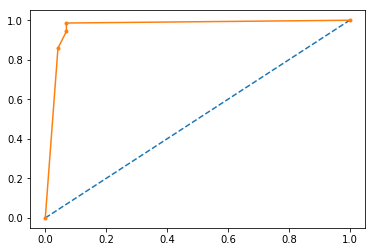

                   precision    recall  f1-score   support

   Class_2_Benign       0.99      0.93      0.96        72
Class_4_Malignant       0.93      0.99      0.96        71

        micro avg       0.96      0.96      0.96       143
        macro avg       0.96      0.96      0.96       143
     weighted avg       0.96      0.96      0.96       143

Confusion Matrix:


array([[67,  5],
       [ 1, 70]], dtype=int64)

In [72]:
#Get AUC and create ROC for decision tree with SelectKBest
# predict probabilities
probs_dtree_skb = decision_tree_skb.predict_proba(test_X_skb)
# keep probabilities for the positive outcome only
probs_dtree_skb = probs_dtree_skb[:, 1]
# calculate AUC
dtree_auc_skb = roc_auc_score(test_Y_skb, probs_dtree_skb)
print('AUC Score: %.3f' % dtree_auc_skb)
# calculate roc curve
fpr_dtree_skb, tpr_dtree_skb, thresholds_dtree_skb = roc_curve(test_Y_skb, probs_dtree_skb)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_dtree_skb, tpr_dtree_skb, marker='.')
# show the plot
plt.show()

#perform classification report of naive bayes model after PCA
class_names = ['Class_2_Benign', 'Class_4_Malignant']
tree_report_skb = classification_report(test_Y_skb, ypred_dtree_skb, target_names=class_names)
print(tree_report_skb)

#create confusion matrix for naive bayes model after selectKbest
print('Confusion Matrix:')
confusion_matrix(test_Y_skb, ypred_dtree_skb)


### The Decision Tree model performed alot better than the the Naive Bayes Model.  The cross validated scores for the three types of decision tree models that we built (using full data, using PCA, and using SelectKBest)  all were in the range of 93-95%.  This could be due to the fact that the decision tree model, along with the other tree based algorithms such as random forest and gradient boosting, work well with independent variables that have a dependence with, or are correlated with, each other.

### Tree based algorithms also work well with data in which the predictor (independent) variables don't have a linear relationship with the output (dependent) variables; as is the case with our dataset here.

# Random Forest

In [73]:
# perform grid search to find the optimal parameters for our random forest model, using the full dataset.
rforest = ensemble.RandomForestClassifier(random_state=20)
forest_param_grid = {'n_estimators':[10,20,50,100], 'max_depth':[2,4,6,8], 'min_samples_split':[2,5,8,10], 
                     'max_features':[2,4,6,7], 'criterion':['entropy', 'gini']}
rforest_grid = GridSearchCV(rforest, forest_param_grid, cv=5)
rforest_grid.fit(train_X, train_Y)
print('Best parameters for decision tree:', rforest_grid.best_params_)

Best parameters for decision tree: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 2, 'min_samples_split': 5, 'n_estimators': 50}


C:\Users\PV-R68G\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [74]:
#initialize and train our random forest model with full data.
rand_forest = ensemble.RandomForestClassifier(n_estimators=50, criterion='entropy', max_depth=4, max_features=2,
                                              min_samples_split=5, random_state=20)

#set start time
start_time_rforest = datetime.datetime.now()

rand_forest.fit(train_X, train_Y)

# Classify, storing the result in a new variable.
y_pred_rforest = rand_forest.predict(test_X)

#get accuracy score from our model
print('Accuracy score for Random Forest Model: ' + str(metrics.accuracy_score(test_Y, y_pred_rforest)))

#calculate end time
end_time_rforest = datetime.datetime.now()

#print the execution run time for our model
print('\nDuration: {}'.format(end_time_rforest - start_time_rforest))
print()

#get average accuracy score of our random forest through cross validation
rforest_cvs = cross_val_score(rand_forest, X, Y, cv=5, scoring='accuracy')
print(rforest_cvs)
print('Average cross validated score from our Random Forest Model is: ' + str(np.mean(rforest_cvs)))

Accuracy score for Random Forest Model: 0.965034965034965

Duration: 0:00:00.099065

[1.         0.96875    0.97916667 0.94680851 1.        ]
Average cross validated score from our Random Forest Model is: 0.978945035460993


AUC Score: 0.990


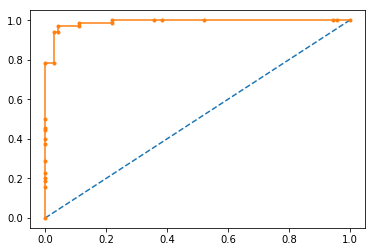

                   precision    recall  f1-score   support

   Class_2_Benign       0.97      0.96      0.97        73
Class_4_Malignant       0.96      0.97      0.96        70

        micro avg       0.97      0.97      0.97       143
        macro avg       0.96      0.97      0.97       143
     weighted avg       0.97      0.97      0.97       143

Confusion Matrix:


array([[70,  3],
       [ 2, 68]], dtype=int64)

In [75]:
#Get AUC and create ROC for decision tree with full data
# predict probabilities
probs_rforest = rand_forest.predict_proba(test_X)
# keep probabilities for the positive outcome only
probs_rforest = probs_rforest[:, 1]
# calculate AUC
rforest_auc = roc_auc_score(test_Y, probs_rforest)
print('AUC Score: %.3f' % rforest_auc)
# calculate roc curve
fpr_rforest, tpr_rforest, thresholds_rforest = roc_curve(test_Y, probs_rforest)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_rforest, tpr_rforest, marker='.')
# show the plot
plt.show()

#perform classification report of naive bayes model after PCA
class_names = ['Class_2_Benign', 'Class_4_Malignant']
rforest_report = classification_report(test_Y, y_pred_rforest, target_names=class_names)
print(rforest_report)

#create confusion matrix for naive bayes model after selectKbest
print('Confusion Matrix:')
confusion_matrix(test_Y, y_pred_rforest)

In [76]:
#using gridsearchcv with our random forest model and PCA
# perform grid search to find the optimal parameters for our random forest model, using the full dataset.
rforest_pca = ensemble.RandomForestClassifier(random_state=20)
forest_param_grid_pca = {'n_estimators':[10,20,50,100], 'max_depth':[2,4,6,8], 'min_samples_split':[2,5,8,10], 
                     'max_features':[2,4,6,7], 'criterion':['entropy', 'gini']}
rforest_grid_pca = GridSearchCV(rforest_pca, forest_param_grid_pca, cv=5)
rforest_grid_pca.fit(train_X_pca, train_Y_pca)
print('Best parameters for decision tree:', rforest_grid_pca.best_params_)

Best parameters for decision tree: {'criterion': 'entropy', 'max_depth': 2, 'max_features': 2, 'min_samples_split': 2, 'n_estimators': 20}


In [77]:
#initialize and train our random forest model with pca
rand_forest_pca = ensemble.RandomForestClassifier(n_estimators=10, criterion='entropy', max_depth=2, max_features=2,
                                              min_samples_split=2, random_state=20)

#set start time
start_time_rforest_pca = datetime.datetime.now()

rand_forest_pca.fit(train_X_pca, train_Y_pca)

# Classify, storing the result in a new variable.
ypred_rforest_pca = rand_forest_pca.predict(test_X_pca)

#get accuracy score from our model
print('Accuracy score for Random Forest Model using PCA is: ' + str(metrics.accuracy_score(test_Y_pca, ypred_rforest_pca)))

#calculate end time
end_time_rforest_pca = datetime.datetime.now()

#print the execution run time for our model
print('\nDuration: {}'.format(end_time_rforest_pca - start_time_rforest_pca))
print()

#get average accuracy score of our random forest through cross validation
rforest_cvs_pca = cross_val_score(rand_forest_pca, X, Y, cv=5, scoring='accuracy')
print(rforest_cvs_pca)
print('Average cross validated score from our Random Forest Model using PCA is: ' + str(np.mean(rforest_cvs_pca)))

Accuracy score for Random Forest Model using PCA is: 0.972027972027972

Duration: 0:00:00.025017

[0.97916667 0.95833333 1.         0.93617021 0.9893617 ]
Average cross validated score from our Random Forest Model using PCA is: 0.9726063829787235


AUC Score: 0.982


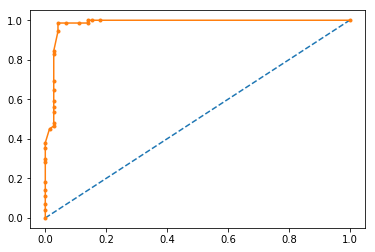

                   precision    recall  f1-score   support

   Class_2_Benign       0.99      0.96      0.97        72
Class_4_Malignant       0.96      0.99      0.97        71

        micro avg       0.97      0.97      0.97       143
        macro avg       0.97      0.97      0.97       143
     weighted avg       0.97      0.97      0.97       143

Confusion Matrix:


array([[69,  3],
       [ 1, 70]], dtype=int64)

In [78]:
#Get AUC and create ROC for random forest with PCA
# predict probabilities
probs_rforest_pca = rand_forest_pca.predict_proba(test_X_pca)
# keep probabilities for the positive outcome only
probs_rforest_pca = probs_rforest_pca[:, 1]
# calculate AUC
rforest_auc_pca = roc_auc_score(test_Y_pca, probs_rforest_pca)
print('AUC Score: %.3f' % rforest_auc_pca)
# calculate roc curve
fpr_rforest_pca, tpr_rforest_pca, thresholds_rforest_pca = roc_curve(test_Y_pca, probs_rforest_pca)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_rforest_pca, tpr_rforest_pca, marker='.')
# show the plot
plt.show()

#perform classification report of naive bayes model after PCA
class_names = ['Class_2_Benign', 'Class_4_Malignant']
rforest_report_pca = classification_report(test_Y_pca, ypred_rforest_pca, target_names=class_names)
print(rforest_report_pca)

#create confusion matrix for naive bayes model after selectKbest
print('Confusion Matrix:')
confusion_matrix(test_Y_pca, ypred_rforest_pca)

In [79]:
#using gridsearchcv with our random forest model and selectKbest
rforest_skb = ensemble.RandomForestClassifier(random_state=57)
forest_param_grid_skb = {'n_estimators':[10,20,50,100], 'max_depth':[2,4,6,8], 'min_samples_split':[2,5,8,10], 
                     'max_features':[2,4,6], 'criterion':['entropy', 'gini']}
rforest_grid_skb = GridSearchCV(rforest_skb, forest_param_grid_skb, cv=5)
rforest_grid_skb.fit(train_X_skb, train_Y_skb)
print('Best parameters for decision tree:', rforest_grid_skb.best_params_)

Best parameters for decision tree: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 2, 'min_samples_split': 2, 'n_estimators': 10}


C:\Users\PV-R68G\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [80]:
#initialize and train our random forest model with selectkbest
rand_forest_skb = ensemble.RandomForestClassifier(n_estimators=20, criterion='entropy', max_depth=4, max_features=2,
                                              min_samples_split=2, random_state=57)

#set start time
start_time_rforest_skb = datetime.datetime.now()

rand_forest_skb.fit(train_X_skb, train_Y_skb)

# Classify, storing the result in a new variable.
ypred_rforest_skb = rand_forest_skb.predict(test_X_skb)

#get accuracy score from our model
print('Accuracy score for Random Forest Model using SelectKBest is: ' + str(metrics.accuracy_score(test_Y_pca, ypred_rforest_skb)))

#calculate end time
end_time_rforest_skb = datetime.datetime.now()

#print the execution run time for our model
print('\nDuration: {}'.format(end_time_rforest_skb - start_time_rforest_skb))
print()

#get average accuracy score of our random forest through cross validation
rforest_cvs_skb = cross_val_score(rand_forest_skb, X, Y, cv=5, scoring='accuracy')
print(rforest_cvs_skb)
print('Average cross validated score from our Random Forest Model using SelectKBest is: ' + str(np.mean(rforest_cvs_skb)))

Accuracy score for Random Forest Model using SelectKBest is: 0.972027972027972

Duration: 0:00:00.041027

[0.97916667 0.96875    1.         0.95744681 1.        ]
Average cross validated score from our Random Forest Model using SelectKBest is: 0.981072695035461


AUC Score: 0.979


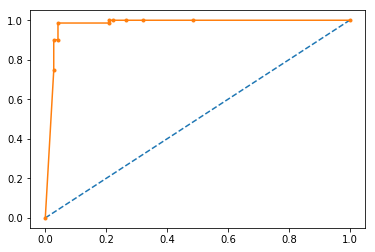

                   precision    recall  f1-score   support

   Class_2_Benign       0.99      0.96      0.97        72
Class_4_Malignant       0.96      0.99      0.97        71

        micro avg       0.97      0.97      0.97       143
        macro avg       0.97      0.97      0.97       143
     weighted avg       0.97      0.97      0.97       143

Confusion Matrix:


array([[69,  3],
       [ 1, 70]], dtype=int64)

In [81]:
#Get AUC and create ROC for random forest with SelectKBest
# predict probabilities
probs_rforest_skb = rand_forest_skb.predict_proba(test_X_skb)
# keep probabilities for the positive outcome only
probs_rforest_skb = probs_rforest_skb[:, 1]
# calculate AUC
rforest_auc_skb = roc_auc_score(test_Y_skb, probs_rforest_skb)
print('AUC Score: %.3f' % rforest_auc_skb)
# calculate roc curve
fpr_rforest_skb, tpr_rforest_skb, thresholds_rforest_skb = roc_curve(test_Y_skb, probs_rforest_skb)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_rforest_skb, tpr_rforest_skb, marker='.')
# show the plot
plt.show()

#perform classification report of naive bayes model after PCA
class_names = ['Class_2_Benign', 'Class_4_Malignant']
rforest_report_skb = classification_report(test_Y_skb, ypred_rforest_skb, target_names=class_names)
print(rforest_report_skb)

#create confusion matrix for naive bayes model after selectKbest
print('Confusion Matrix:')
confusion_matrix(test_Y_skb, ypred_rforest_skb)

### The Random Forest Models, as expected, worked even better than the Decision Tree models.  This is because Random Forests, being one of the major ensemble modeling alogorithms, create many decision trees that are each based on a different subset of the dataset.  Then The decision trees within the random forest vote on the final output, and the majority class wins.  This is called bagging, and the idea of this is that the combination of learning from many tree models (versus one in a regular decision tree algorithm) increases the overall result.

### This could explain the higher average cross validated score of 98% from the random forest models, versus scores that fell in the range of 93-95% with the regular decision tree models.

# Gradient Boost:

In [83]:
#Run gridsearchcv to find the best parameters for gradient boosting using full dataset
gboost_param_grid = {'n_estimators':[200,400,600], 'max_depth':[2,4,6], 'min_samples_leaf': [3, 5, 9], 
                     'learning_rate': [.05, .02, .01], 'subsample': [.7, .8, .9]}
gb_model = ensemble.GradientBoostingClassifier(random_state=67)

gb_grid = GridSearchCV(gb_model, gboost_param_grid, cv=5)
gb_grid.fit(train_X, train_Y)
print('Best parameters for Gradient Boost Model are:', gb_grid.best_params_)

Best parameters for Gradient Boost Model are: {'learning_rate': 0.02, 'max_depth': 2, 'min_samples_leaf': 5, 'n_estimators': 200, 'subsample': 0.7}


In [84]:
# Initialize and fit the model using full data
Grad_boost = ensemble.GradientBoostingClassifier(learning_rate=0.02, max_depth=2, min_samples_leaf=5, 
                                                 n_estimators=200, subsample=0.7, random_state=67)

#set start time
start_time_gb = datetime.datetime.now()

#fit and train the model
Grad_boost.fit(train_X, train_Y)

# Classify, storing the result in a new variable.
y_pred_Gboost = Grad_boost.predict(test_X)

#get accuracy score from our model
print('Accuracy score for Gradient Boost Model: ' + str(metrics.accuracy_score(test_Y, y_pred_Gboost)))

#calculate end time
end_time_gb = datetime.datetime.now()

#print the execution run time for our model
print('\nDuration: {}'.format(end_time_gb - start_time_gb))
print()

#get average accuracy score using cross validation
Grad_boost_cvs = cross_val_score(Grad_boost, X, Y, cv=5, scoring='accuracy')
print(Grad_boost_cvs)

print('Average cross validated score from our Gradient Boosting model is: ' + str(np.mean(Grad_boost_cvs)))

Accuracy score for Gradient Boost Model: 0.958041958041958

Duration: 0:00:00.215027

[0.9375     0.96875    0.98958333 0.96808511 1.        ]
Average cross validated score from our Gradient Boosting model is: 0.9727836879432624


AUC Score: 0.992


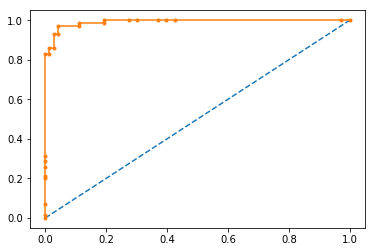

              precision    recall  f1-score   support

     Class_0       0.96      0.96      0.96        73
     Class_1       0.96      0.96      0.96        70

   micro avg       0.96      0.96      0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143

Confusion Matrix:


array([[70,  3],
       [ 3, 67]], dtype=int64)

In [85]:
#Get AUC and create ROC
# predict probabilities
probs_Gboost = Grad_boost.predict_proba(test_X)
# keep probabilities for the positive outcome only
probs_Gboost = probs_Gboost[:, 1]
# calculate AUC
Gboost_auc = roc_auc_score(test_Y, probs_Gboost)
print('AUC Score: %.3f' % Gboost_auc)
# calculate roc curve
fpr_Gboost, tpr_Gboost, thresholds_Gboost = roc_curve(test_Y, probs_Gboost)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_Gboost, tpr_Gboost, marker='.')
# show the plot
plt.show()


# perform classification report of the Gradient Boosting model
class_names = ['Class_0', 'Class_1']
Gboost_report = classification_report(test_Y, y_pred_Gboost, target_names=class_names)
print(Gboost_report)

#confusion matrix
print('Confusion Matrix:')
confusion_matrix(test_Y, y_pred_Gboost)


In [86]:
#Run gridsearchcv to find the best parameters for gradient boosting using PCA
gboost_params_pca = {'n_estimators':[200,400,600], 'max_depth':[2,4,6], 'min_samples_leaf': [3, 5, 9], 
                     'learning_rate': [.05, .02, .01], 'subsample': [.7, .8, .9]}
gb_model_pca = ensemble.GradientBoostingClassifier(random_state=77)

gb_grid_pca = GridSearchCV(gb_model_pca, gboost_params_pca, cv=5)
gb_grid_pca.fit(train_X_pca, train_Y_pca)
print('Best parameters for Gradient Boost Model using PCA are:', gb_grid_pca.best_params_)

Best parameters for Gradient Boost Model using PCA are: {'learning_rate': 0.05, 'max_depth': 2, 'min_samples_leaf': 3, 'n_estimators': 200, 'subsample': 0.7}


In [88]:
# Initialize and fit the model using PCA
Grad_boost_pca = ensemble.GradientBoostingClassifier(learning_rate=0.05, max_depth=2, min_samples_leaf=3, 
                                                 n_estimators=200, subsample=0.7, random_state=77)

#set start time
starttime_gb_pca = datetime.datetime.now()

#fit and train the model
Grad_boost_pca.fit(train_X_pca, train_Y_pca)

# Classify, storing the result in a new variable.
ypred_Gboost_pca = Grad_boost_pca.predict(test_X_pca)

#get accuracy score from our model
print('Accuracy score for Gradient Boost Model using PCA is: ' + str(metrics.accuracy_score(test_Y_pca, ypred_Gboost_pca)))

#calculate end time
endtime_gb_pca = datetime.datetime.now()

#print the execution run time for our model
print('\nDuration: {}'.format(endtime_gb_pca - starttime_gb_pca))
print()

#get average accuracy score using cross validation
Grad_boost_cvs_pca = cross_val_score(Grad_boost_pca, X, Y, cv=5, scoring='accuracy')
print(Grad_boost_cvs_pca)

print('Average cross validated score from our Gradient Boosting model using PCA is: ' + str(np.mean(Grad_boost_cvs_pca)))

Accuracy score for Gradient Boost Model using PCA is: 0.972027972027972

Duration: 0:00:00.206349

[0.92708333 0.96875    0.98958333 0.9787234  1.        ]
Average cross validated score from our Gradient Boosting model using PCA is: 0.9728280141843971


AUC Score: 0.978


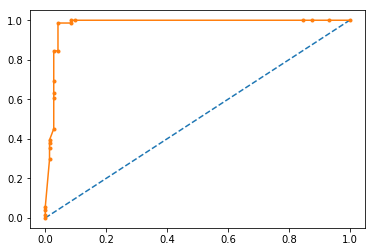

              precision    recall  f1-score   support

     Class_0       0.99      0.96      0.97        72
     Class_1       0.96      0.99      0.97        71

   micro avg       0.97      0.97      0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

Confusion Matrix:


array([[69,  3],
       [ 1, 70]], dtype=int64)

In [89]:
#Get AUC and create ROC
# predict probabilities
probs_Gboost_pca = Grad_boost_pca.predict_proba(test_X_pca)
# keep probabilities for the positive outcome only
probs_Gboost_pca = probs_Gboost_pca[:, 1]
# calculate AUC
Gboost_auc_pca = roc_auc_score(test_Y_pca, probs_Gboost_pca)
print('AUC Score: %.3f' % Gboost_auc_pca)
# calculate roc curve
fpr_Gboost_pca, tpr_Gboost_pca, thresholds_Gboost_pca = roc_curve(test_Y_pca, probs_Gboost_pca)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_Gboost_pca, tpr_Gboost_pca, marker='.')
# show the plot
plt.show()


# perform classification report of the Gradient Boosting model
class_names = ['Class_0', 'Class_1']
Gboost_report_pca = classification_report(test_Y_pca, ypred_Gboost_pca, target_names=class_names)
print(Gboost_report_pca)

#confusion matrix
print('Confusion Matrix:')
confusion_matrix(test_Y_pca, ypred_Gboost_pca)


In [90]:
#Run gridsearchcv to find the best parameters for gradient boosting using SelectKBest
gboost_params_skb = {'n_estimators':[200,400,600], 'max_depth':[2,4,6], 'min_samples_leaf': [3, 5, 9], 
                     'learning_rate': [.05, .02, .01], 'subsample': [.7, .8, .9]}
gb_model_skb = ensemble.GradientBoostingClassifier(89)

gb_grid_skb = GridSearchCV(gb_model_skb, gboost_params_skb, cv=5)
gb_grid_skb.fit(train_X_skb, train_Y_skb)
print('Best parameters for Gradient Boost Model using SelectKBest are:', gb_grid_skb.best_params_)

Best parameters for Gradient Boost Model using SelectKBest are: {'learning_rate': 0.05, 'max_depth': 2, 'min_samples_leaf': 5, 'n_estimators': 200, 'subsample': 0.7}


In [92]:
# Initialize and fit the model using SelectKbest
Grad_boost_skb = ensemble.GradientBoostingClassifier(learning_rate=0.05, max_depth=2, min_samples_leaf=5, 
                                                 n_estimators=200, subsample=0.7, random_state=89)

#set start time
starttime_gb_skb = datetime.datetime.now()

#fit and train the model
Grad_boost_skb.fit(train_X_skb, train_Y_skb)

# Classify, storing the result in a new variable.
ypred_Gboost_skb = Grad_boost_skb.predict(test_X_skb)

#get accuracy score from our model
print('Accuracy score for Gradient Boosting Model using SelectKBest: ' + str(metrics.accuracy_score(test_Y_skb, ypred_Gboost_skb)))

#calculate end time
endtime_gb_skb = datetime.datetime.now()

#print the execution run time for our model
print('\nDuration: {}'.format(endtime_gb_skb - starttime_gb_skb))
print()

#get average accuracy score using cross validation
Grad_boost_cvs_skb = cross_val_score(Grad_boost_skb, X, Y, cv=5, scoring='accuracy')
print(Grad_boost_cvs_skb)

print('Average cross validated score from our Gradient Boosting model using SelectKBest is: ' + str(np.mean(Grad_boost_cvs_skb)))

Accuracy score for Gradient Boosting Model using SelectKBest: 0.958041958041958

Duration: 0:00:00.216002

[0.92708333 0.96875    0.97916667 0.96808511 1.        ]
Average cross validated score from our Gradient Boosting model using SelectKBest is: 0.9686170212765959


AUC Score: 0.981


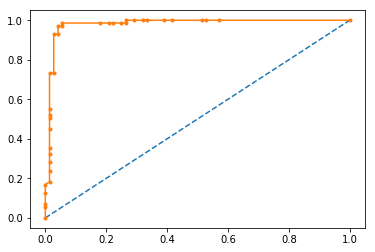

              precision    recall  f1-score   support

     Class_0       0.97      0.94      0.96        72
     Class_1       0.95      0.97      0.96        71

   micro avg       0.96      0.96      0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143

Confusion Matrix:


array([[68,  4],
       [ 2, 69]], dtype=int64)

In [93]:
#Get AUC and create ROC
# predict probabilities
probs_Gboost_skb = Grad_boost_skb.predict_proba(test_X_skb)
# keep probabilities for the positive outcome only
probs_Gboost_skb = probs_Gboost_skb[:, 1]
# calculate AUC
Gboost_auc_skb = roc_auc_score(test_Y_skb, probs_Gboost_skb)
print('AUC Score: %.3f' % Gboost_auc_skb)
# calculate roc curve
fpr_Gboost_skb, tpr_Gboost_skb, thresholds_Gboost_skb = roc_curve(test_Y_skb, probs_Gboost_skb)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_Gboost_skb, tpr_Gboost_skb, marker='.')
# show the plot
plt.show()


# perform classification report of the Gradient Boosting model
class_names = ['Class_0', 'Class_1']
Gboost_report_skb = classification_report(test_Y_skb, ypred_Gboost_skb, target_names=class_names)
print(Gboost_report_skb)

#confusion matrix
print('Confusion Matrix:')
confusion_matrix(test_Y_skb, ypred_Gboost_skb)

### The Gradient Boosting models did much better than the basic decision tree model, with a score of 97%.  This model probably worked better because, like a random forest, it also builds an ensemble of trees to have a better prediction accuracy.  But unlike a random forest, it builds the next tree in the ensemble by accounting for the errors in the previous tree.  The errors in our classification model would be the incorrect predictios.  With this method, you get a better overall result.

# Logistic Regression:

In [95]:
#Run gridsearchcv to find the best parameters for logistic regression using full data
LogReg_params = {'C': np.logspace(-10, 10, 5)}
LogReg_Model = LogisticRegression(random_state=97)

LogReg_grid = GridSearchCV(LogReg_Model, LogReg_params, cv=5)
LogReg_grid.fit(train_X, train_Y)
print('Best parameters for Logistic Regression are:', LogReg_grid.best_params_)

C:\Users\PV-R68G\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PV-R68G\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PV-R68G\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PV-R68G\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PV-R68G\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

Best parameters for Logistic Regression are: {'C': 100000.0}


C:\Users\PV-R68G\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PV-R68G\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PV-R68G\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PV-R68G\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PV-R68G\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

In [97]:
#initialize and train our model with full data
LogReg = LogisticRegression(C=1e6, random_state=97)

#set start time
starttime_LogReg = datetime.datetime.now()

#fit and train the model
LogReg.fit(train_X, train_Y)

# Classify, storing the result in a new variable.
y_pred_LogReg = LogReg.predict(test_X)

#get accuracy score from our model
print('Accuracy score for Logistic regression Model: ' + str(metrics.accuracy_score(test_Y, y_pred_LogReg)))

#calculate end time
endtime_LogReg = datetime.datetime.now()

#print the execution run time for our model
print('\nDuration: {}'.format(endtime_LogReg - starttime_LogReg))
print()

#get average accuracy score using cross validation
LogReg_cvs = cross_val_score(LogReg, X, Y, cv=5, scoring='accuracy')
print(LogReg_cvs)

print('Average cross validated score from our log regression model is: ' + str(np.mean(LogReg_cvs)))

Accuracy score for Logistic regression Model: 0.965034965034965

Duration: 0:00:00.008001

[0.96875    0.95833333 0.98958333 0.9787234  1.        ]
Average cross validated score from our log regression model is: 0.9790780141843971


C:\Users\PV-R68G\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PV-R68G\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PV-R68G\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PV-R68G\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PV-R68G\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

AUC Score: 0.997


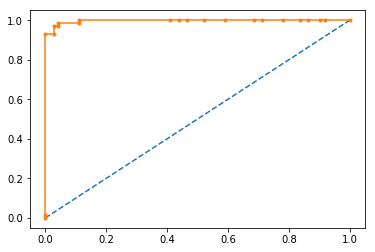

              precision    recall  f1-score   support

     Class_0       0.97      0.96      0.97        73
     Class_1       0.96      0.97      0.96        70

   micro avg       0.97      0.97      0.97       143
   macro avg       0.96      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



array([[70,  3],
       [ 2, 68]], dtype=int64)

In [98]:
#Get AUC and create ROC
# predict probabilities
probs_LogReg = LogReg.predict_proba(test_X)
# keep probabilities for the positive outcome only
probs_LogReg = probs_LogReg[:, 1]
# calculate AUC
LogReg_auc = roc_auc_score(test_Y, probs_LogReg)
print('AUC Score: %.3f' % LogReg_auc)
# calculate roc curve
fpr_LogReg, tpr_LogReg, thresholds_LogReg = roc_curve(test_Y, probs_LogReg)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_LogReg, tpr_LogReg, marker='.')
# show the plot
plt.show()


# perform classification report of the logistic regression model
class_names = ['Class_0', 'Class_1']
LogReg_report = classification_report(test_Y, y_pred_LogReg, target_names=class_names)
print(LogReg_report)

# create confusion matrix
confusion_matrix(test_Y, y_pred_LogReg)




In [110]:
#initialize and train our model with PCA
LogReg_pca = LogisticRegression(C=1e6, random_state=140)

#set start time
starttime_LogReg_pca = datetime.datetime.now()

#fit and train the model
LogReg_pca.fit(train_X_pca, train_Y_pca)

# Classify, storing the result in a new variable.
ypred_LogReg_pca = LogReg_pca.predict(test_X_pca)

#get accuracy score from our model
print('Accuracy score for Logistic regression Model using PCA: ' + str(metrics.accuracy_score(test_Y_pca, ypred_LogReg_pca)))

#calculate end time
endtime_LogReg_pca = datetime.datetime.now()

#print the execution run time for our model
print('\nDuration: {}'.format(endtime_LogReg_pca - starttime_LogReg_pca))
print()

#get average accuracy score using cross validation
LogReg_cvs_pca = cross_val_score(LogReg_pca, X, Y, cv=5, scoring='accuracy')
print(LogReg_cvs_pca)

print('Average cross validated score from our log regression model using PCA is: ' + str(np.mean(LogReg_cvs)))

Accuracy score for Logistic regression Model using PCA: 0.958041958041958

Duration: 0:00:00.005004

[0.96875    0.95833333 0.98958333 0.9787234  1.        ]
Average cross validated score from our log regression model using PCA is: 0.9790780141843971


C:\Users\PV-R68G\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PV-R68G\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PV-R68G\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PV-R68G\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PV-R68G\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

AUC Score: 0.989


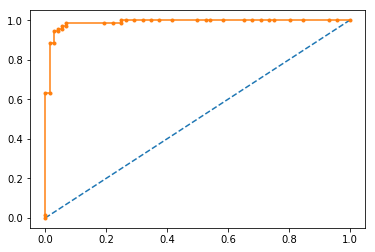

              precision    recall  f1-score   support

     Class_0       0.96      0.96      0.96        72
     Class_1       0.96      0.96      0.96        71

   micro avg       0.96      0.96      0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



array([[69,  3],
       [ 3, 68]], dtype=int64)

In [111]:
#Get AUC and create ROC
# predict probabilities
probs_LogReg_pca = LogReg_pca.predict_proba(test_X_pca)
# keep probabilities for the positive outcome only
probs_LogReg_pca = probs_LogReg_pca[:, 1]
# calculate AUC
LogReg_auc_pca = roc_auc_score(test_Y_pca, probs_LogReg_pca)
print('AUC Score: %.3f' % LogReg_auc_pca)
# calculate roc curve
fpr_LogReg_pca, tpr_LogReg_pca, thresholds_LogReg_pca = roc_curve(test_Y_pca, probs_LogReg_pca)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_LogReg_pca, tpr_LogReg_pca, marker='.')
# show the plot
plt.show()


# perform classification report of the logistic regression model
class_names = ['Class_0', 'Class_1']
LogReg_report_pca = classification_report(test_Y_pca, ypred_LogReg_pca, target_names=class_names)
print(LogReg_report_pca)

# create confusion matrix
confusion_matrix(test_Y_pca, ypred_LogReg_pca)


In [112]:
#initialize and train our model with SelectKBest
LogReg_skb = LogisticRegression(C=1e9, random_state=180)

#set start time
starttime_LogReg_skb = datetime.datetime.now()

#fit and train the model
LogReg_skb.fit(train_X_skb, train_Y_skb)

# Classify, storing the result in a new variable.
ypred_LogReg_skb = LogReg_skb.predict(test_X_skb)

#get accuracy score from our model
print('Accuracy score for Logistic regression Model using SelectKBest: ' + str(metrics.accuracy_score(test_Y_skb, ypred_LogReg_skb)))

#calculate end time
endtime_LogReg_skb = datetime.datetime.now()

#print the execution run time for our model
print('\nDuration: {}'.format(endtime_LogReg_skb - starttime_LogReg_skb))
print()

#get average accuracy score using cross validation
LogReg_cvs_skb = cross_val_score(LogReg_skb, X, Y, cv=5, scoring='accuracy')
print(LogReg_cvs_skb)

print('Average cross validated score from our log regression model using PCA is: ' + str(np.mean(LogReg_cvs_skb)))

Accuracy score for Logistic regression Model using SelectKBest: 0.951048951048951

Duration: 0:00:00.006005

[0.96875    0.95833333 0.98958333 0.9787234  1.        ]
Average cross validated score from our log regression model using PCA is: 0.9790780141843971


C:\Users\PV-R68G\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PV-R68G\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PV-R68G\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PV-R68G\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PV-R68G\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

AUC Score: 0.987


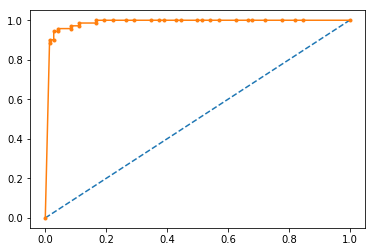

              precision    recall  f1-score   support

     Class_0       0.95      0.96      0.95        72
     Class_1       0.96      0.94      0.95        71

   micro avg       0.95      0.95      0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



array([[69,  3],
       [ 4, 67]], dtype=int64)

In [113]:
#Get AUC and create ROC
# predict probabilities
probs_LogReg_skb = LogReg_skb.predict_proba(test_X_skb)
# keep probabilities for the positive outcome only
probs_LogReg_skb = probs_LogReg_skb[:, 1]
# calculate AUC
LogReg_auc_skb = roc_auc_score(test_Y_skb, probs_LogReg_skb)
print('AUC Score: %.3f' % LogReg_auc_skb)
# calculate roc curve
fpr_LogReg_skb, tpr_LogReg_skb, thresholds_LogReg_skb = roc_curve(test_Y_skb, probs_LogReg_skb)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_LogReg_skb, tpr_LogReg_skb, marker='.')
# show the plot
plt.show()


# perform classification report of the logistic regression model
class_names = ['Class_0', 'Class_1']
LogReg_report_skb = classification_report(test_Y_skb, ypred_LogReg_skb, target_names=class_names)
print(LogReg_report_skb)

# create confusion matrix
confusion_matrix(test_Y_skb, ypred_LogReg_skb)

# KNN:

In [114]:
# perform grid search to find the optimal parameters for our KNN model using full data.
KNN_model = KNeighborsClassifier()
KNN_params = {'n_neighbors':[5,10,15], 'weights':['uniform', 'distance']}
KNN_grid = GridSearchCV(KNN_model, KNN_params, cv=5)
KNN_grid.fit(train_X, train_Y)
print('Best parameters for data:', KNN_grid.best_params_)

Best parameters for data: {'n_neighbors': 5, 'weights': 'distance'}


In [115]:
#initialize and train our model using the training set
KNN = KNeighborsClassifier(n_neighbors=5, weights='distance')

#set start time
starttime_knn = datetime.datetime.now()

#fit and train the model
KNN.fit(train_X,train_Y)

#Make predictions using test_X, and store results in new variable
y_pred_KNN = KNN.predict(test_X)

print('Accuracy score for KNN Model: ' + str(metrics.accuracy_score(test_Y, y_pred_KNN)))

#calculate end time
endtime_knn = datetime.datetime.now()

#print the execution run time for our model
print('\nDuration: {}'.format(endtime_knn - starttime_knn))
print()


KNN_cvs = cross_val_score(KNN, X, Y, cv=5, scoring='accuracy')
print(KNN_cvs)
print('Average cross validated score from our KNN model is: ' + str(np.mean(KNN_cvs)))


Accuracy score for KNN Model: 0.958041958041958

Duration: 0:00:00.011009

[0.95833333 0.95833333 1.         0.94680851 0.9893617 ]
Average cross validated score from our KNN model is: 0.9705673758865249


AUC Score: 0.983


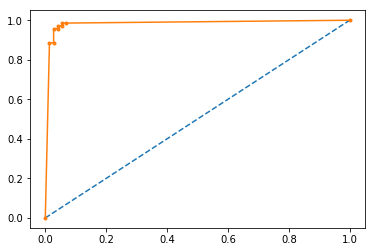

              precision    recall  f1-score   support

     Class_0       0.96      0.96      0.96        73
     Class_1       0.96      0.96      0.96        70

   micro avg       0.96      0.96      0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



array([[69,  4],
       [ 2, 68]], dtype=int64)

In [116]:
#Get AUC and create ROC
# predict probabilities
probs_KNN = KNN.predict_proba(test_X)
# keep probabilities for the positive outcome only
probs_KNN = probs_KNN[:, 1]
# calculate AUC
KNN_auc = roc_auc_score(test_Y, probs_KNN)
print('AUC Score: %.3f' % KNN_auc)
# calculate roc curve
fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(test_Y, probs_KNN)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_KNN, tpr_KNN, marker='.')
# show the plot
plt.show()

# perform classification report of the KNN model
class_names = ['Class_0', 'Class_1']
KNN_report = classification_report(test_Y, y_pred_KNN, target_names=class_names)
print(Gboost_report)

# confusion Matrix
confusion_matrix(test_Y, y_pred_KNN)



In [117]:
# perform grid search to find the optimal parameters for our KNN model using PCA.
KNN_model_pca = KNeighborsClassifier()
KNN_params_pca = {'n_neighbors':[5,10,15], 'weights':['uniform', 'distance']}
KNN_grid_pca = GridSearchCV(KNN_model_pca, KNN_params_pca, cv=5)
KNN_grid_pca.fit(train_X_pca, train_Y_pca)
print('Best parameters for data:', KNN_grid_pca.best_params_)

Best parameters for data: {'n_neighbors': 5, 'weights': 'uniform'}


In [119]:
#initialize and train our model using the training set using PCA
KNN_pca = KNeighborsClassifier(n_neighbors=5, weights='uniform')

#set start time
starttime_knn_pca = datetime.datetime.now()

#fit and train the model
KNN_pca.fit(train_X_pca,train_Y_pca)

#Make predictions using test_X, and store results in new variable
ypred_KNN_pca = KNN_pca.predict(test_X_pca)

print('Accuracy score for KNN Model with PCA: ' + str(metrics.accuracy_score(test_Y_pca, ypred_KNN_pca)))

#calculate end time
endtime_knn_pca = datetime.datetime.now()

#print the execution run time for our model
print('\nDuration: {}'.format(endtime_knn_pca - starttime_knn_pca))
print()


KNN_cvs_pca = cross_val_score(KNN_pca, X, Y, cv=5, scoring='accuracy')
print(KNN_cvs_pca)
print('Average cross validated score from our KNN model with PCA is: ' + str(np.mean(KNN_cvs_pca)))


Accuracy score for KNN Model with PCA: 0.958041958041958

Duration: 0:00:00.006003

[0.95833333 0.95833333 1.         0.94680851 0.9893617 ]
Average cross validated score from our KNN model with PCA is: 0.9705673758865249


AUC Score: 0.976


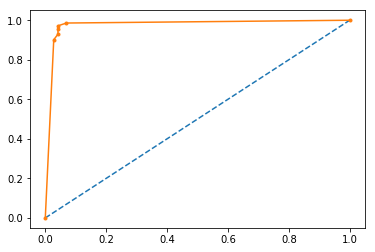

              precision    recall  f1-score   support

     Class_0       0.96      0.96      0.96        73
     Class_1       0.96      0.96      0.96        70

   micro avg       0.96      0.96      0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



array([[69,  3],
       [ 3, 68]], dtype=int64)

In [120]:
#Get AUC and create ROC
# predict probabilities
probs_KNN_pca = KNN_pca.predict_proba(test_X_pca)
# keep probabilities for the positive outcome only
probs_KNN_pca = probs_KNN_pca[:, 1]
# calculate AUC
KNN_auc_pca = roc_auc_score(test_Y_pca, probs_KNN_pca)
print('AUC Score: %.3f' % KNN_auc_pca)
# calculate roc curve
fpr_KNN_pca, tpr_KNN_pca, thresholds_KNN_pca = roc_curve(test_Y_pca, probs_KNN_pca)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_KNN_pca, tpr_KNN_pca, marker='.')
# show the plot
plt.show()

# perform classification report of the KNN model
class_names = ['Class_0', 'Class_1']
KNN_report_pca = classification_report(test_Y_pca, ypred_KNN_pca, target_names=class_names)
print(Gboost_report)

# confusion Matrix
confusion_matrix(test_Y_pca, ypred_KNN_pca)

In [121]:
# perform grid search to find the optimal parameters for our KNN model using SelectKBest.
KNN_model_skb = KNeighborsClassifier()
KNN_params_skb = {'n_neighbors':[5,10,15], 'weights':['uniform', 'distance']}
KNN_grid_skb = GridSearchCV(KNN_model_skb, KNN_params_skb, cv=5)
KNN_grid_skb.fit(train_X_skb, train_Y_skb)
print('Best parameters for data:', KNN_grid_skb.best_params_)

Best parameters for data: {'n_neighbors': 5, 'weights': 'uniform'}


In [122]:
#initialize and train our model using the training set and selectkbest
KNN_skb = KNeighborsClassifier(n_neighbors=5, weights='uniform')

#set start time
starttime_knn_skb = datetime.datetime.now()

#fit and train the model
KNN_skb.fit(train_X_skb,train_Y_skb)

#Make predictions using test_X, and store results in new variable
ypred_KNN_skb = KNN_skb.predict(test_X_skb)

print('Accuracy score for KNN Model with selectkbest is: ' + str(metrics.accuracy_score(test_Y_skb, ypred_KNN_skb)))

#calculate end time
endtime_knn_skb = datetime.datetime.now()

#print the execution run time for our model
print('\nDuration: {}'.format(endtime_knn_skb - starttime_knn_skb))
print()


KNN_cvs_skb = cross_val_score(KNN_skb, X, Y, cv=5, scoring='accuracy')
print(KNN_cvs_skb)
print('Average cross validated score from our KNN model using SelectKBest is: ' + str(np.mean(KNN_cvs_skb)))

Accuracy score for KNN Model with selectkbest is: 0.965034965034965

Duration: 0:00:00.006004

[0.95833333 0.95833333 1.         0.94680851 0.9893617 ]
Average cross validated score from our KNN model using SelectKBest is: 0.9705673758865249


AUC Score: 0.977


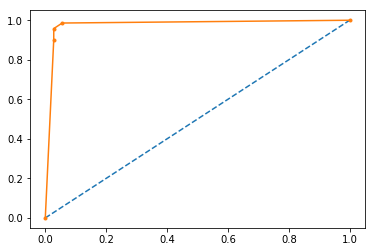

              precision    recall  f1-score   support

     Class_0       0.96      0.97      0.97        72
     Class_1       0.97      0.96      0.96        71

   micro avg       0.97      0.97      0.97       143
   macro avg       0.97      0.96      0.97       143
weighted avg       0.97      0.97      0.97       143



array([[70,  2],
       [ 3, 68]], dtype=int64)

In [123]:
#Get AUC and create ROC
# predict probabilities
probs_KNN_skb = KNN_skb.predict_proba(test_X_skb)
# keep probabilities for the positive outcome only
probs_KNN_skb = probs_KNN_skb[:, 1]
# calculate AUC
KNN_auc_skb = roc_auc_score(test_Y_skb, probs_KNN_skb)
print('AUC Score: %.3f' % KNN_auc_skb)
# calculate roc curve
fpr_KNN_skb, tpr_KNN_skb, thresholds_KNN_skb = roc_curve(test_Y_skb, probs_KNN_skb)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_KNN_skb, tpr_KNN_skb, marker='.')
# show the plot
plt.show()

# perform classification report of the KNN model
class_names = ['Class_0', 'Class_1']
KNN_report_skb = classification_report(test_Y_skb, ypred_KNN_skb, target_names=class_names)
print(KNN_report_skb)

# confusion Matrix
confusion_matrix(test_Y_skb, ypred_KNN_skb)

# SVM:

In [124]:
from sklearn.svm import SVC

# Instantiate our model and fit using the full data
svm = SVC(kernel = 'linear', probability=True, random_state=16)

#set start time
starttime_svm = datetime.datetime.now()

#fit and train the model
svm.fit(train_X, train_Y)

# Classify, storing the result in a new variable.
y_pred_svm = svm.predict(test_X)

#get accuracy score from our model
print('Accuracy score for svm Model: ' + str(metrics.accuracy_score(test_Y, y_pred_svm)))

#calculate end time
endtime_svm = datetime.datetime.now()

#print the execution run time for our model
print('\nDuration: {}'.format(endtime_svm - starttime_svm))
print()

#get average accuracy score of svm model using cross validation
svm_cvs = cross_val_score(svm, X, Y, cv=5, scoring='accuracy')
print(svm_cvs)
print('Average accuracy score from our SVM model is: ' + str(np.mean(svm_cvs)))

Accuracy score for svm Model: 0.965034965034965

Duration: 0:00:00.067044

[0.97916667 0.95833333 0.98958333 0.96808511 1.        ]
Average accuracy score from our SVM model is: 0.9790336879432624


AUC Score: 0.995


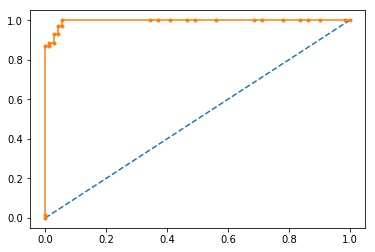

              precision    recall  f1-score   support

     Class_0       0.99      0.95      0.97        73
     Class_1       0.95      0.99      0.97        70

   micro avg       0.97      0.97      0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



array([[69,  4],
       [ 1, 69]], dtype=int64)

In [125]:
#Get AUC and create ROC
# predict probabilities
probs_svm = svm.predict_proba(test_X)
# keep probabilities for the positive outcome only
probs_svm = probs_svm[:, 1]
# calculate AUC
svm_auc = roc_auc_score(test_Y, probs_svm)
print('AUC Score: %.3f' % svm_auc)
# calculate roc curve
fpr_svm, tpr_svm, thresholds_svm = roc_curve(test_Y, probs_svm)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_svm, tpr_svm, marker='.')
# show the plot
plt.show()

# perform classification report of the svm model
class_names = ['Class_0', 'Class_1']
svm_report = classification_report(test_Y, y_pred_svm, target_names=class_names)
print(svm_report)

#create confusion matrix for svm
confusion_matrix(test_Y, y_pred_svm)

In [126]:
from sklearn.svm import SVC

# Instantiate our model and fit using the PCA
svm_pca = SVC(kernel = 'linear', probability=True, random_state=16)

#set start time
starttime_svm_pca = datetime.datetime.now()

#fit and train the model
svm_pca.fit(train_X_pca, train_Y_pca)

# Classify, storing the result in a new variable.
ypred_svm_pca = svm_pca.predict(test_X_pca)

#get accuracy score from our model
print('Accuracy score for svm Model with PCA: ' + str(metrics.accuracy_score(test_Y_pca, ypred_svm_pca)))

#calculate end time
endtime_svm_pca = datetime.datetime.now()

#print the execution run time for our model
print('\nDuration: {}'.format(endtime_svm_pca - starttime_svm_pca))
print()

#get average accuracy score of svm model using cross validation
svm_cvs_pca = cross_val_score(svm_pca, X, Y, cv=5, scoring='accuracy')
print(svm_cvs_pca)
print('Average accuracy score from our SVM model is: ' + str(np.mean(svm_cvs_pca)))

Accuracy score for svm Model with PCA: 0.951048951048951

Duration: 0:00:00.008006

[0.97916667 0.95833333 0.98958333 0.96808511 1.        ]
Average accuracy score from our SVM model is: 0.9790336879432624


AUC Score: 0.991


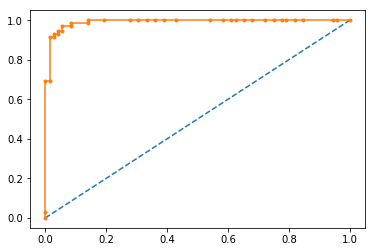

              precision    recall  f1-score   support

     Class_0       0.96      0.94      0.95        72
     Class_1       0.94      0.96      0.95        71

   micro avg       0.95      0.95      0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



array([[68,  4],
       [ 3, 68]], dtype=int64)

In [127]:
#Get AUC and create ROC
# predict probabilities
probs_svm_pca = svm_pca.predict_proba(test_X_pca)
# keep probabilities for the positive outcome only
probs_svm_pca = probs_svm_pca[:, 1]
# calculate AUC
svm_auc_pca = roc_auc_score(test_Y_pca, probs_svm_pca)
print('AUC Score: %.3f' % svm_auc_pca)
# calculate roc curve
fpr_svm_pca, tpr_svm_pca, thresholds_svm_pca = roc_curve(test_Y_pca, probs_svm_pca)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_svm_pca, tpr_svm_pca, marker='.')
# show the plot
plt.show()

# perform classification report of the svm model
class_names = ['Class_0', 'Class_1']
svm_report_pca = classification_report(test_Y_pca, ypred_svm_pca, target_names=class_names)
print(svm_report_pca)

#create confusion matrix for svm
confusion_matrix(test_Y_pca, ypred_svm_pca)

In [128]:
from sklearn.svm import SVC

# Instantiate our model and fit using the full data
svm_skb = SVC(kernel = 'linear', probability=True, random_state=16)

#set start time
starttime_skb = datetime.datetime.now()

#fit and train the model
svm_skb.fit(train_X_skb, train_Y_skb)

# Classify, storing the result in a new variable.
ypred_svm_skb = svm_skb.predict(test_X_skb)

#get accuracy score from our model
print('Accuracy score for svm Model with selectkbest: ' + str(metrics.accuracy_score(test_Y_skb, ypred_svm_skb)))

#calculate end time
endtime_skb = datetime.datetime.now()

#print the execution run time for our model
print('\nDuration: {}'.format(endtime_skb - starttime_skb))
print()

#get average accuracy score of svm model using cross validation
svm_cvs_skb = cross_val_score(svm_skb, X, Y, cv=5, scoring='accuracy')
print(svm_cvs_skb)
print('Average accuracy score from our SVM model is: ' + str(np.mean(svm_cvs_skb)))

Accuracy score for svm Model with selectkbest: 0.965034965034965

Duration: 0:00:00.009006

[0.97916667 0.95833333 0.98958333 0.96808511 1.        ]
Average accuracy score from our SVM model is: 0.9790336879432624


AUC Score: 0.995


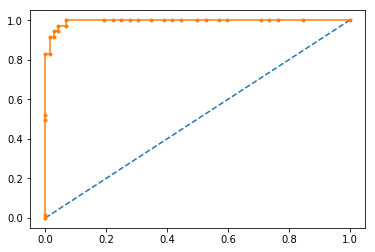

              precision    recall  f1-score   support

     Class_0       0.97      0.96      0.97        72
     Class_1       0.96      0.97      0.97        71

   micro avg       0.97      0.97      0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



array([[69,  3],
       [ 2, 69]], dtype=int64)

In [129]:
#Get AUC and create ROC
# predict probabilities
probs_svm_skb = svm_skb.predict_proba(test_X_skb)
# keep probabilities for the positive outcome only
probs_svm_skb = probs_svm_skb[:, 1]
# calculate AUC
svm_auc_skb = roc_auc_score(test_Y_skb, probs_svm_skb)
print('AUC Score: %.3f' % svm_auc_skb)
# calculate roc curve
fpr_svm_skb, tpr_svm_skb, thresholds_svm_skb = roc_curve(test_Y_skb, probs_svm_skb)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_svm_skb, tpr_svm_skb, marker='.')
# show the plot
plt.show()

# perform classification report of the svm model
class_names = ['Class_0', 'Class_1']
svm_report_skb = classification_report(test_Y_skb, ypred_svm_skb, target_names=class_names)
print(svm_report_skb)

#create confusion matrix for svm
confusion_matrix(test_Y_skb, ypred_svm_skb)

# Conclusion

### For the particular dataset that we have here with its specfic issues, such as the correlation among the indepedent variables and the non-linear relationship between the independent and dependent variables, I would suggest using the Random Forest Model.  It had a high average cross validated score of 98% and its sensitivity rate was also particularly high at 96% for class variable value of "benign" and 97% for class variable value "malignant".  Sensitivity is more important in this case because it is important to accurately predict each case of breast cancer.